## Pre-interview test for internship
##### Submitted By: Aarushi Gupta

##### 1) Consider the following time-series recorded at continuous time-stamps/ units
#####    X: 1,3,9,21,10,11,-7,8,9,11,13,15,16,31,33
######     Find the maximum repetition interval in time units i.e. primary wavelength.

In [1]:
#storing the given values in the list
lst = [1,3,9,21,10,11,-7,8,9,11,13,15,16,31,33]

We can assume that there is some periodicity in the signal-it might repeat daily, weekly or monthly.
Translating a time series into the Fourier domain might help to find periodicity. 
Following the below steps might help with this:
- Taking the time series into frequency domain
- We ignore frequency 0 and observe that the value is largest for index 3- this indicates that within our time series x, the signal repeats 3 times. Hence, the length of the signal- the period-- would be 15/3=5.

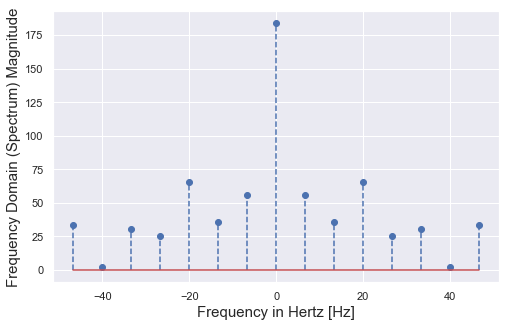

In [2]:
#importing the fourier transform module from scipy
from scipy import fftpack
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import numpy as np
f_s = 100
x = fftpack.fft(lst)
freqs = fftpack.fftfreq(len(x)) * f_s

plt.figure(figsize=[8,5])
plt.stem(freqs, np.abs(x), linefmt='--')
plt.xlabel('Frequency in Hertz [Hz]',fontsize=15)
plt.ylabel('Frequency Domain (Spectrum) Magnitude',fontsize=15)
plt.show()

##### 2)  Write a function/ method to print a mirror image of a binary tree in a recursive manner considering the input parameter to be root node.

- Mirror of a Tree: Mirror of a Binary Tree T is another Binary Tree M(T) with left and right children of all non-leaf nodes interchanged. 
- Given a binary tree, the task is to create a new binary tree which is a mirror image of the given binary tree.
- Approach: Write a recursive function that will take two nodes as the argument, one of the original tree and the other of the newly created tree. Now, for every passed node of the original tree, create a corresponding node in the mirror tree and then recursively call the same method for the child nodes but passing the left child of the original tree node with the right child of the mirror tree node and the right child of the original tree node with the left child of the mirror tree node.

In [3]:
# creating a class named as 'Node'
class Node:
  def __init__(self,data):
    self.left = None
    self.data = data
    self.right = None

In [4]:
class BST:
  def buildBST(self, root, ele):
    if root == None:
      return Node(ele)

    if ele < root.data:
      root.left = self.buildBST(root.left, ele)
    else:
      root.right = self.buildBST(root.right, ele)

    return root

  def mirror(self, root):
    if root == None:
      return

    temp = root
    self.mirror(root.left)
    self.mirror(root.right)

    temp = root.left
    root.left = root.right
    root.right = temp

  
  def inorder(self, root):
    if root == None:
      return

    self.inorder(root.left)
    print(root.data)
    self.inorder(root.right)

root = None
b = BST()
for ele in [11, 7, 28, 6, 12, 36]:
    root = b.buildBST(root, ele)

b.inorder(root)
b.mirror(root)
print()
b.inorder(root)

6
7
11
12
28
36

36
28
12
11
7
6


- Time Complexity : O(n)
- Space Complexity: O(1)

##### 3) Consider the following series of 2 parameters x and y

#####      X: 0,1,3,5,6,4,2,1,-1,-5,9,7,11,12,13
#####      Y: 1,3,9,21,10,11,-7,8,9,11,13,15,16,31,33

######     Find the linear regression equation for y and x considering x as an independent parameter. Calculate error and bias parts in the regression relation.

In [5]:
#importing the relevent modules
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
#storing the given data points into arrays
x = np.array([0,1,3,5,6,4,2,1,-1,-5,9,7,11,12,13])
y = np.array([1,3,9,21,10,11,-7,8,9,11,13,15,16,31,33])

x = x.reshape(-1,1)
#Creating the instance(object) for the linear regression class
lr = LinearRegression()
lr.fit(x,y)
#prnting the intercept and coefficient of the data points
print(lr.coef_)
print(lr.intercept_)

[1.4284695]
5.790938280413843


**Equation of line is given by:** $$ y\ =\ 1.43x\ +\ 5.79$$

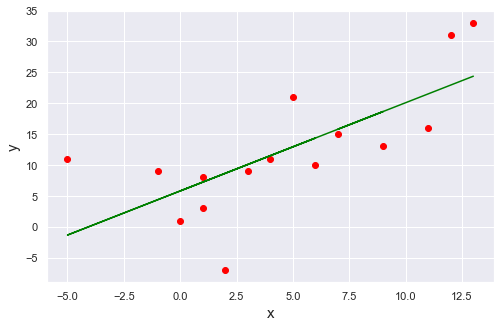

In [6]:
plt.figure(figsize=[8,5])
# plotting the scatter plot to explore the relation between the two variables x and y
plt.scatter(x,y,color='red')
# plotting the linear regression line on the same scatter plot
plt.plot(x, lr.predict(x), color='Green')
plt.xlabel('x',fontsize=15)
plt.ylabel('y',fontsize=15)
plt.show()

In [7]:
# printing the root mean squared error
def RMSE(y_true, y_predict):
    return np.sqrt(mean_squared_error(y_true, y_predict))
RMSE(y, lr.predict(x))

7.063148894330655

- Bias in Linear Regression i.e a is used to move the prediction line up or down (offset). Without a the line always goes through (0, 0) which may not always lead to a good fit. When there are no independent variables, y=a which is sample mean.
- bias for the limited dataset (small size) is difference between the predicted value and the actual value.

In [8]:
mean_absolute_error(y, lr.predict(x))

5.672351052443811

##### 4)  Generate a random linked list of n nodes, whose property is defined in such a way that the value of every node is a perfect square less than k^3 for any number k<=n.

######     Mention time and space complexity of both programs explicitly.


In [9]:
# creating the class known as 'Node'
class Node:
  def __init__(self, data, next = None):
    self.data = data
    self.next = next

A linked list is a linear data structure, in which the elements are not stored at contiguous memory locations. The elements in a linked list are linked using pointers as shown in the below image:
- Link − Each link of a linked list can store a data called an element.
- Next − Each link of a linked list contains a link to the next link called Next.
- LinkedList − A Linked List contains the connection link to the first link called First.

In [10]:
import random
class LinkedList:
  def __init__(self):
    self.head = None


  def insert_at_end(self, n, k):
    if k <= n and n>=1:
      i = 0
      x = random.randint(0, n)
      if x**2 < k**3:
        self.head = Node(x**2)
        num = 1 #1 node has been created
        while num < n:
          x = random.randint(0,n)
          if x**2 < k**3: 
            current = self.head
            while current.next != None:
              current = current.next
            current.next = Node(x**2)
            num += 1
          else:
            x = random.randint(0,n)
      else:
        x = random.randint(0,n)

    else:
      print("Enter correct values")

  def display(self):
      current = self.head
      while current != None:
          print(current.data, end = " ")
          current = current.next

In [11]:
LL = LinkedList()

LL.insert_at_end(10,5)
LL.display()

81 36 9 16 81 100 0 1 36 49 

- Time Complexity :- O(n^2)
- Space Complexity :- O(1)